##1 - Coleta de Dados

###1.1 - Escolha da Base de Dados

####Link do dataframe
https://www.kaggle.com/loveall/cervical-cancer-risk-classification

### 1.2 - Importação dos dados

In [192]:
#conectar ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###1.3 - importando bibliotecas

In [193]:
#importando bibliotecas
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import random

In [194]:
#com o arquivo de dados já no Drive
#fazer a leitura para o dataframe
#nesse exemplo é a base https://archive.ics.uci.edu/ml/datasets/Student+Performance#
df = pd.read_csv("/content/drive/MyDrive/Aulas SAD/cancer/kag_risk_factors_cervical_cancer.csv", sep=',')

###1.4 - Carregando e visualizando os dados

In [195]:
#Carregando toda a base de dados para a variável df (df = dataframe)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [196]:
#quantidade de linhas e colunas
df.shape

(858, 36)

In [197]:
#visualizar os nomes das colunas
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [198]:
#cria um novo dataframe a partir do filtro das colunas selecionada
colunas_selecionadas = ['Age',
                        'Number of sexual partners',
                        'Num of pregnancies',
                        'Smokes',
                        'Smokes (years)',
                        'Hormonal Contraceptives',
                        'Hormonal Contraceptives (years)',
                        'IUD',
                        'IUD (years)',
                        'STDs',
                        'STDs (number)',
                        'Biopsy'                        
                        ]

In [199]:
#Cria um novo dataframe a partir de 'df' apenas com as colunas com nomes presentes em 'colunas_selecionas'
df = df.filter(colunas_selecionadas)

In [200]:
#Renomeia o nome das colunas
df.rename(columns = {'Age' : 'idade',
                     'Number of sexual partners' : 'num_sex_parceiros',
                     'Num of pregnancies' : 'num_gravidez',
                     'Smokes' : 'fumante',
                     'Smokes (years)' : 'fumante_anos',
                     'Hormonal Contraceptives' : 'contracep_hormonais',
                     'Hormonal Contraceptives (years)' : 'contracep_hormonais_anos',
                     'IUD' : 'DIU',
                     'IUD (years)' : 'DIU_anos',
                     'STDs' : 'DSTs',
                     'STDs (number)' : 'num_DSTs',
                     'Biopsy' : 'biopsia'
                     },
          inplace = True)

In [201]:
df.columns

Index(['idade', 'num_sex_parceiros', 'num_gravidez', 'fumante', 'fumante_anos',
       'contracep_hormonais', 'contracep_hormonais_anos', 'DIU', 'DIU_anos',
       'DSTs', 'num_DSTs', 'biopsia'],
      dtype='object')

In [202]:
#ativando o Data Table Display para melhor visualização dos dados
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [203]:
#Código para desativarr o Data Table Display 
#from google.colab import data_table
#data_table.disable_dataframe_formatter()

In [204]:
#Exibe as cinco primeiras tuplas do DF
df

,idade,num_sex_parceiros,num_gravidez,fumante,fumante_anos,contracep_hormonais,contracep_hormonais_anos,DIU,DIU_anos,DSTs,num_DSTs,biopsia
0,18,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,34,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,52,5.0,4.0,1.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0
4,46,3.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
854,32,2.0,1.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0
855,25,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0
856,33,2.0,2.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0


In [205]:
#Exibe as cinco últimas tuplas do DF
df.tail()

,idade,num_sex_parceiros,num_gravidez,fumante,fumante_anos,contracep_hormonais,contracep_hormonais_anos,DIU,DIU_anos,DSTs,num_DSTs,biopsia
853,34,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
854,32,2.0,1.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0
855,25,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0
856,33,2.0,2.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0
857,29,2.0,1.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0


In [206]:
#Exibe detalhes de medidas matemáticos das colunas do DF
df.describe()

,idade,biopsia
count,858.000000,858.000000
mean,26.820513,0.064103
std,8.497948,0.245078
min,13.000000,0.000000
25%,20.000000,0.000000
50%,25.000000,0.000000
75%,32.000000,0.000000
max,84.000000,1.000000


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   idade                     858 non-null    int64 
 1   num_sex_parceiros         858 non-null    object
 2   num_gravidez              858 non-null    object
 3   fumante                   858 non-null    object
 4   fumante_anos              858 non-null    object
 5   contracep_hormonais       858 non-null    object
 6   contracep_hormonais_anos  858 non-null    object
 7   DIU                       858 non-null    object
 8   DIU_anos                  858 non-null    object
 9   DSTs                      858 non-null    object
 10  num_DSTs                  858 non-null    object
 11  biopsia                   858 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 80.6+ KB


##Transformação de dados

###Transformar tipo da coluna `'num_sex_parceiros'`

In [208]:
df.num_sex_parceiros.unique()

array(['4.0', '1.0', '5.0', '3.0', '2.0', '6.0', '?', '7.0', '15.0',
       '8.0', '10.0', '28.0', '9.0'], dtype=object)

In [209]:
valores = ['4.0', '1.0', '5.0', '3.0', '2.0', '6.0', '-1', '7.0', '15.0',
       '8.0', '10.0', '28.0', '9.0']

In [210]:
df['num_sex_parceiros'] = df['num_sex_parceiros'].replace("?",-1)

In [211]:
for valor in valores:
  conv_valor = float(valor)
  df['num_sex_parceiros'] = df['num_sex_parceiros'].replace(valor,conv_valor)

In [212]:
df.num_sex_parceiros.unique()

array([ 4.,  1.,  5.,  3.,  2.,  6., -1.,  7., 15.,  8., 10., 28.,  9.])

In [213]:
df.num_sex_parceiros = df.num_sex_parceiros.astype(int)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   idade                     858 non-null    int64 
 1   num_sex_parceiros         858 non-null    int64 
 2   num_gravidez              858 non-null    object
 3   fumante                   858 non-null    object
 4   fumante_anos              858 non-null    object
 5   contracep_hormonais       858 non-null    object
 6   contracep_hormonais_anos  858 non-null    object
 7   DIU                       858 non-null    object
 8   DIU_anos                  858 non-null    object
 9   DSTs                      858 non-null    object
 10  num_DSTs                  858 non-null    object
 11  biopsia                   858 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 80.6+ KB


In [215]:
media_parceiro = df.num_sex_parceiros.mean()

In [216]:
media_parceiro

2.4207459207459205

In [217]:
media_parceiro = round(media_parceiro)

In [218]:
media_parceiro

2

In [219]:
df['num_sex_parceiros'].loc[df['num_sex_parceiros'] == -1] = media_parceiro

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [220]:
df.num_sex_parceiros.unique()

array([ 4,  1,  5,  3,  2,  6,  7, 15,  8, 10, 28,  9])

In [221]:
#Exibe detalhes de medidas matemáticos das colunas do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   idade                     858 non-null    int64 
 1   num_sex_parceiros         858 non-null    int64 
 2   num_gravidez              858 non-null    object
 3   fumante                   858 non-null    object
 4   fumante_anos              858 non-null    object
 5   contracep_hormonais       858 non-null    object
 6   contracep_hormonais_anos  858 non-null    object
 7   DIU                       858 non-null    object
 8   DIU_anos                  858 non-null    object
 9   DSTs                      858 non-null    object
 10  num_DSTs                  858 non-null    object
 11  biopsia                   858 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 80.6+ KB


###Transformar tipo da coluna `'num_gravidez'`

In [222]:
df.num_gravidez.unique()

array(['1.0', '4.0', '2.0', '6.0', '3.0', '5.0', '?', '8.0', '7.0', '0.0',
       '11.0', '10.0'], dtype=object)

In [223]:
valores = ['1.0', '4.0', '2.0', '6.0', '3.0', '5.0', '-1', '8.0', '7.0', '0.0',
       '11.0', '10.0']

In [224]:
df['num_gravidez'] = df['num_gravidez'].replace("?",-1)

In [225]:
for valor in valores:
  conv_valor = float(valor)
  df['num_gravidez'] = df['num_gravidez'].replace(valor,conv_valor)

In [226]:
df.num_gravidez.unique()

array([ 1.,  4.,  2.,  6.,  3.,  5., -1.,  8.,  7.,  0., 11., 10.])

In [227]:
df.num_gravidez = df.num_gravidez.astype(int)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   idade                     858 non-null    int64 
 1   num_sex_parceiros         858 non-null    int64 
 2   num_gravidez              858 non-null    int64 
 3   fumante                   858 non-null    object
 4   fumante_anos              858 non-null    object
 5   contracep_hormonais       858 non-null    object
 6   contracep_hormonais_anos  858 non-null    object
 7   DIU                       858 non-null    object
 8   DIU_anos                  858 non-null    object
 9   DSTs                      858 non-null    object
 10  num_DSTs                  858 non-null    object
 11  biopsia                   858 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 80.6+ KB


In [229]:
media_gravidez = df.num_gravidez.mean()

In [230]:
media_gravidez

2.061771561771562

In [231]:
media_gravidez = round(media_gravidez)
media_gravidez

2

In [232]:

df['num_gravidez'].loc[df['num_gravidez'] == -1] = media_parceiro

In [233]:
df.num_gravidez.unique()

array([ 1,  4,  2,  6,  3,  5,  8,  7,  0, 11, 10])

###Transformar tipo da coluna `'fumante'`

In [234]:
df.fumante.unique()

array(['0.0', '1.0', '?'], dtype=object)

In [235]:
df['fumante'] = df['fumante'].replace('?',99)
df['fumante'] = df['fumante'].replace('1.0',1)
df['fumante'] = df['fumante'].replace('0.0',0)


In [236]:
df.fumante.unique()

array([ 0,  1, 99])

In [237]:
df.fumante = df.fumante.astype(int)

In [238]:
moda_fumante = df.fumante.mode()
moda_fumante

0    0
dtype: int64

In [239]:
moda_fumante = int(moda_fumante)
moda_fumante

0

In [240]:
df['fumante'].loc[df['fumante'] == 99] = moda_fumante

In [241]:
df.fumante.unique()

array([0, 1])

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   idade                     858 non-null    int64 
 1   num_sex_parceiros         858 non-null    int64 
 2   num_gravidez              858 non-null    int64 
 3   fumante                   858 non-null    int64 
 4   fumante_anos              858 non-null    object
 5   contracep_hormonais       858 non-null    object
 6   contracep_hormonais_anos  858 non-null    object
 7   DIU                       858 non-null    object
 8   DIU_anos                  858 non-null    object
 9   DSTs                      858 non-null    object
 10  num_DSTs                  858 non-null    object
 11  biopsia                   858 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 80.6+ KB


###Transformar tipo da coluna `'fumante_anos'`

In [243]:
df.fumante_anos.unique()

array(['0.0', '37.0', '34.0', '1.266972909', '3.0', '12.0', '?', '18.0',
       '7.0', '19.0', '21.0', '15.0', '13.0', '16.0', '8.0', '4.0',
       '10.0', '22.0', '14.0', '0.5', '11.0', '9.0', '2.0', '5.0', '6.0',
       '1.0', '32.0', '24.0', '28.0', '20.0', '0.16'], dtype=object)

In [244]:
valores = ['0.0', '37.0', '34.0', '1.266972909', '3.0', '12.0', '-1', '18.0',
       '7.0', '19.0', '21.0', '15.0', '13.0', '16.0', '8.0', '4.0',
       '10.0', '22.0', '14.0', '0.5', '11.0', '9.0', '2.0', '5.0', '6.0',
       '1.0', '32.0', '24.0', '28.0', '20.0', '0.16']

In [245]:
df['fumante_anos'] = df['fumante_anos'].replace('?',-1)

In [246]:
for valor in valores:
  conv_valor = float(valor)
  df['fumante_anos'] = df['fumante_anos'].replace(valor,conv_valor)

In [247]:
df.fumante_anos.unique()


array([ 0.        , 37.        , 34.        ,  1.26697291,  3.        ,
       12.        , -1.        , 18.        ,  7.        , 19.        ,
       21.        , 15.        , 13.        , 16.        ,  8.        ,
        4.        , 10.        , 22.        , 14.        ,  0.5       ,
       11.        ,  9.        ,  2.        ,  5.        ,  6.        ,
        1.        , 32.        , 24.        , 28.        , 20.        ,
        0.16      ])

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     858 non-null    int64  
 1   num_sex_parceiros         858 non-null    int64  
 2   num_gravidez              858 non-null    int64  
 3   fumante                   858 non-null    int64  
 4   fumante_anos              858 non-null    float64
 5   contracep_hormonais       858 non-null    object 
 6   contracep_hormonais_anos  858 non-null    object 
 7   DIU                       858 non-null    object 
 8   DIU_anos                  858 non-null    object 
 9   DSTs                      858 non-null    object 
 10  num_DSTs                  858 non-null    object 
 11  biopsia                   858 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 80.6+ KB


In [249]:
media_anos_fum = df.fumante_anos.mean()
media_anos_fum

1.1860892699708625

In [250]:
media_anos_fum = round(media_anos_fum,1)
media_anos_fum

1.2

In [251]:
df['fumante_anos'].loc[df['fumante_anos'] == -1. ] = media_anos_fum

In [252]:
df.fumante_anos = round(df.fumante_anos,2)

In [253]:
df.fumante_anos.unique()

array([ 0.  , 37.  , 34.  ,  1.27,  3.  , 12.  ,  1.2 , 18.  ,  7.  ,
       19.  , 21.  , 15.  , 13.  , 16.  ,  8.  ,  4.  , 10.  , 22.  ,
       14.  ,  0.5 , 11.  ,  9.  ,  2.  ,  5.  ,  6.  ,  1.  , 32.  ,
       24.  , 28.  , 20.  ,  0.16])

###Transformar tipo da coluna `'contracep_hormonais'`

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     858 non-null    int64  
 1   num_sex_parceiros         858 non-null    int64  
 2   num_gravidez              858 non-null    int64  
 3   fumante                   858 non-null    int64  
 4   fumante_anos              858 non-null    float64
 5   contracep_hormonais       858 non-null    object 
 6   contracep_hormonais_anos  858 non-null    object 
 7   DIU                       858 non-null    object 
 8   DIU_anos                  858 non-null    object 
 9   DSTs                      858 non-null    object 
 10  num_DSTs                  858 non-null    object 
 11  biopsia                   858 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 80.6+ KB


In [255]:
df.contracep_hormonais.unique()

array(['0.0', '1.0', '?'], dtype=object)

In [256]:
df['contracep_hormonais'] = df['contracep_hormonais'].replace('?',99)
df['contracep_hormonais'] = df['contracep_hormonais'].replace('1.0',1)
df['contracep_hormonais'] = df['contracep_hormonais'].replace('0.0',0)

In [257]:
df.contracep_hormonais.unique()

array([ 0,  1, 99])

In [258]:
df.contracep_hormonais = df.contracep_hormonais.astype(int)

In [259]:
moda_contracep = df.contracep_hormonais.mode()
moda_contracep

0    1
dtype: int64

In [260]:
moda_contracep = int(moda_contracep)
moda_contracep

1

In [261]:
df['contracep_hormonais'].loc[df['contracep_hormonais'] == 99] = moda_contracep

In [262]:
df.fumante.unique()

array([0, 1])

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     858 non-null    int64  
 1   num_sex_parceiros         858 non-null    int64  
 2   num_gravidez              858 non-null    int64  
 3   fumante                   858 non-null    int64  
 4   fumante_anos              858 non-null    float64
 5   contracep_hormonais       858 non-null    int64  
 6   contracep_hormonais_anos  858 non-null    object 
 7   DIU                       858 non-null    object 
 8   DIU_anos                  858 non-null    object 
 9   DSTs                      858 non-null    object 
 10  num_DSTs                  858 non-null    object 
 11  biopsia                   858 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 80.6+ KB


###Transformar tipo da coluna `'contracep_hormonais_anos'`

In [264]:
df.contracep_hormonais_anos.unique()

array(['0.0', '3.0', '15.0', '2.0', '8.0', '10.0', '5.0', '0.25', '7.0',
       '22.0', '19.0', '0.5', '1.0', '0.58', '9.0', '13.0', '11.0', '4.0',
       '12.0', '16.0', '0.33', '?', '0.16', '14.0', '0.08', '2.282200521',
       '0.66', '6.0', '1.5', '0.42', '0.67', '0.75', '2.5', '4.5', '6.5',
       '0.17', '20.0', '3.5', '0.41', '30.0', '17.0'], dtype=object)

In [265]:
valores = ['0.0', '3.0', '15.0', '2.0', '8.0', '10.0', '5.0', '0.25', '7.0',
       '22.0', '19.0', '0.5', '1.0', '0.58', '9.0', '13.0', '11.0', '4.0',
       '12.0', '16.0', '0.33', '-1', '0.16', '14.0', '0.08', '2.282200521',
       '0.66', '6.0', '1.5', '0.42', '0.67', '0.75', '2.5', '4.5', '6.5',
       '0.17', '20.0', '3.5', '0.41', '30.0', '17.0']

In [266]:
df['contracep_hormonais_anos'] = df['contracep_hormonais_anos'].replace('?',-1)

In [267]:
for valor in valores:
  conv_valor = float(valor)
  df['contracep_hormonais_anos'] = df['contracep_hormonais_anos'].replace(valor,conv_valor)

In [268]:
df.contracep_hormonais_anos.unique()

array([ 0.        ,  3.        , 15.        ,  2.        ,  8.        ,
       10.        ,  5.        ,  0.25      ,  7.        , 22.        ,
       19.        ,  0.5       ,  1.        ,  0.58      ,  9.        ,
       13.        , 11.        ,  4.        , 12.        , 16.        ,
        0.33      , -1.        ,  0.16      , 14.        ,  0.08      ,
        2.28220052,  0.66      ,  6.        ,  1.5       ,  0.42      ,
        0.67      ,  0.75      ,  2.5       ,  4.5       ,  6.5       ,
        0.17      , 20.        ,  3.5       ,  0.41      , 30.        ,
       17.        ])

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     858 non-null    int64  
 1   num_sex_parceiros         858 non-null    int64  
 2   num_gravidez              858 non-null    int64  
 3   fumante                   858 non-null    int64  
 4   fumante_anos              858 non-null    float64
 5   contracep_hormonais       858 non-null    int64  
 6   contracep_hormonais_anos  858 non-null    float64
 7   DIU                       858 non-null    object 
 8   DIU_anos                  858 non-null    object 
 9   DSTs                      858 non-null    object 
 10  num_DSTs                  858 non-null    object 
 11  biopsia                   858 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 80.6+ KB


In [270]:
media_anos_contra = df.contracep_hormonais_anos.mean()
media_anos_contra

1.846520280934732

In [271]:
media_anos_contra = round(media_anos_contra,1)
media_anos_contra

1.8

In [272]:
df['contracep_hormonais_anos'].loc[df['contracep_hormonais_anos'] == -1. ] = media_anos_contra

In [273]:
df.contracep_hormonais_anos = round(df.contracep_hormonais_anos,2)

In [274]:
df.contracep_hormonais_anos.sort_values().unique()

array([ 0.  ,  0.08,  0.16,  0.17,  0.25,  0.33,  0.41,  0.42,  0.5 ,
        0.58,  0.66,  0.67,  0.75,  1.  ,  1.5 ,  1.8 ,  2.  ,  2.28,
        2.5 ,  3.  ,  3.5 ,  4.  ,  4.5 ,  5.  ,  6.  ,  6.5 ,  7.  ,
        8.  ,  9.  , 10.  , 11.  , 12.  , 13.  , 14.  , 15.  , 16.  ,
       17.  , 19.  , 20.  , 22.  , 30.  ])

###Transformar tipo da coluna `'DIU'`

In [275]:
df.DIU.unique()

array(['0.0', '1.0', '?'], dtype=object)

In [276]:
df['DIU'] = df['DIU'].replace('?',99)
df['DIU'] = df['DIU'].replace('1.0',1)
df['DIU'] = df['DIU'].replace('0.0',0)


In [277]:
df.DIU.unique()

array([ 0,  1, 99])

In [278]:
df.DIU = df.DIU.astype(int)

In [279]:
moda_DIU = df.DIU.mode()
moda_DIU

0    0
dtype: int64

In [280]:
moda_DIU = int(moda_DIU)
moda_DIU

0

In [281]:
df['DIU'].loc[df['DIU'] == 99] = moda_DIU

In [282]:
df.DIU.unique()

array([0, 1])

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     858 non-null    int64  
 1   num_sex_parceiros         858 non-null    int64  
 2   num_gravidez              858 non-null    int64  
 3   fumante                   858 non-null    int64  
 4   fumante_anos              858 non-null    float64
 5   contracep_hormonais       858 non-null    int64  
 6   contracep_hormonais_anos  858 non-null    float64
 7   DIU                       858 non-null    int64  
 8   DIU_anos                  858 non-null    object 
 9   DSTs                      858 non-null    object 
 10  num_DSTs                  858 non-null    object 
 11  biopsia                   858 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 80.6+ KB


In [284]:
df.DIU.unique()

array([0, 1])

###Transformar tipo da coluna `'DIU_anos'`

In [285]:
df.DIU_anos.unique()

array(['0.0', '7.0', '?', '5.0', '8.0', '6.0', '1.0', '0.58', '2.0',
       '19.0', '0.5', '17.0', '0.08', '0.25', '10.0', '11.0', '3.0',
       '15.0', '12.0', '9.0', '1.5', '0.91', '4.0', '0.33', '0.41',
       '0.16', '0.17'], dtype=object)

In [286]:
valores = ['0.0', '7.0', '-1', '5.0', '8.0', '6.0', '1.0', '0.58', '2.0',
       '19.0', '0.5', '17.0', '0.08', '0.25', '10.0', '11.0', '3.0',
       '15.0', '12.0', '9.0', '1.5', '0.91', '4.0', '0.33', '0.41',
       '0.16', '0.17']

In [287]:
df['DIU_anos'] = df['DIU_anos'].replace('?',-1)

In [288]:
for valor in valores:
  conv_valor = float(valor)
  df['DIU_anos'] = df['DIU_anos'].replace(valor,conv_valor)

In [289]:
df.DIU_anos.unique()

array([ 0.  ,  7.  , -1.  ,  5.  ,  8.  ,  6.  ,  1.  ,  0.58,  2.  ,
       19.  ,  0.5 , 17.  ,  0.08,  0.25, 10.  , 11.  ,  3.  , 15.  ,
       12.  ,  9.  ,  1.5 ,  0.91,  4.  ,  0.33,  0.41,  0.16,  0.17])

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     858 non-null    int64  
 1   num_sex_parceiros         858 non-null    int64  
 2   num_gravidez              858 non-null    int64  
 3   fumante                   858 non-null    int64  
 4   fumante_anos              858 non-null    float64
 5   contracep_hormonais       858 non-null    int64  
 6   contracep_hormonais_anos  858 non-null    float64
 7   DIU                       858 non-null    int64  
 8   DIU_anos                  858 non-null    float64
 9   DSTs                      858 non-null    object 
 10  num_DSTs                  858 non-null    object 
 11  biopsia                   858 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 80.6+ KB


In [291]:
media_anos_DIU = df.DIU_anos.mean()
media_anos_DIU

0.3082400932400932

In [292]:
media_anos_DIU = round(media_anos_DIU,1)
media_anos_DIU

0.3

In [293]:
df['DIU_anos'].loc[df['DIU_anos'] == -1. ] = media_anos_DIU

In [294]:
df.DIU_anos = round(df.DIU_anos,2)

In [295]:
df.DIU_anos.sort_values().unique()

array([ 0.  ,  0.08,  0.16,  0.17,  0.25,  0.3 ,  0.33,  0.41,  0.5 ,
        0.58,  0.91,  1.  ,  1.5 ,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,
        7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 15.  , 17.  , 19.  ])

###Transformar tipo da coluna `'DSTs'`

In [296]:
df.DSTs.unique()

array(['0.0', '1.0', '?'], dtype=object)

In [297]:
df['DSTs'] = df['DSTs'].replace('?',99)
df['DSTs'] = df['DSTs'].replace('1.0',1)
df['DSTs'] = df['DSTs'].replace('0.0',0)


In [298]:
df.DSTs.unique()

array([ 0,  1, 99])

In [299]:
df.DSTs = df.DSTs.astype(int)

In [300]:
moda_DSTs = df.DSTs.mode()
moda_DSTs

0    0
dtype: int64

In [301]:
moda_DSTs = int(moda_DSTs)
moda_DSTs

0

In [302]:
df['DSTs'].loc[df['DSTs'] == 99] = moda_DSTs

In [303]:
df.DSTs.unique()

array([0, 1])

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     858 non-null    int64  
 1   num_sex_parceiros         858 non-null    int64  
 2   num_gravidez              858 non-null    int64  
 3   fumante                   858 non-null    int64  
 4   fumante_anos              858 non-null    float64
 5   contracep_hormonais       858 non-null    int64  
 6   contracep_hormonais_anos  858 non-null    float64
 7   DIU                       858 non-null    int64  
 8   DIU_anos                  858 non-null    float64
 9   DSTs                      858 non-null    int64  
 10  num_DSTs                  858 non-null    object 
 11  biopsia                   858 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 80.6+ KB


###Transformar tipo da coluna `'num_DSTs'`

In [305]:
df.num_DSTs.unique()

array(['0.0', '2.0', '1.0', '?', '3.0', '4.0'], dtype=object)

In [306]:
valores = ['0.0', '2.0', '1.0', '-1', '3.0', '4.0']

In [307]:
df['num_DSTs'] = df['num_DSTs'].replace('?','-1')

In [308]:
for valor in valores:
  conv_valor = float(valor)
  df['num_DSTs'] = df['num_DSTs'].replace(valor,conv_valor)

In [309]:
df.num_DSTs.unique()

array([ 0.,  2.,  1., -1.,  3.,  4.])

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     858 non-null    int64  
 1   num_sex_parceiros         858 non-null    int64  
 2   num_gravidez              858 non-null    int64  
 3   fumante                   858 non-null    int64  
 4   fumante_anos              858 non-null    float64
 5   contracep_hormonais       858 non-null    int64  
 6   contracep_hormonais_anos  858 non-null    float64
 7   DIU                       858 non-null    int64  
 8   DIU_anos                  858 non-null    float64
 9   DSTs                      858 non-null    int64  
 10  num_DSTs                  858 non-null    float64
 11  biopsia                   858 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 80.6 KB


In [311]:
media_num_DSTs = df.num_DSTs.mean()
media_num_DSTs

0.03263403263403263

In [312]:
media_num_DSTs = round(media_num_DSTs,2)
media_num_DSTs

0.03

In [313]:
df['num_DSTs'].loc[df['num_DSTs'] == -1. ] = media_num_DSTs

In [314]:
df.num_DSTs = round(df.num_DSTs,2)

In [315]:
df.num_DSTs.sort_values().unique()

array([0.  , 0.03, 1.  , 2.  , 3.  , 4.  ])

#Última visualização antes de salvar

In [316]:
#Conferindo como ficou as primerias tuplas do DF depois das alterações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     858 non-null    int64  
 1   num_sex_parceiros         858 non-null    int64  
 2   num_gravidez              858 non-null    int64  
 3   fumante                   858 non-null    int64  
 4   fumante_anos              858 non-null    float64
 5   contracep_hormonais       858 non-null    int64  
 6   contracep_hormonais_anos  858 non-null    float64
 7   DIU                       858 non-null    int64  
 8   DIU_anos                  858 non-null    float64
 9   DSTs                      858 non-null    int64  
 10  num_DSTs                  858 non-null    float64
 11  biopsia                   858 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 80.6 KB


In [317]:
#Visualizando detalhes de uma tupla aletória
import random
x = round((random.uniform(0, 858)))

df.loc[x]

idade                       23.0
num_sex_parceiros            2.0
num_gravidez                 1.0
fumante                      0.0
fumante_anos                 0.0
contracep_hormonais          1.0
contracep_hormonais_anos     6.0
DIU                          0.0
DIU_anos                     0.0
DSTs                         0.0
num_DSTs                     0.0
biopsia                      0.0
Name: 800, dtype: float64

In [318]:
#Exibindo o DF inteiro
df

,idade,num_sex_parceiros,num_gravidez,fumante,fumante_anos,contracep_hormonais,contracep_hormonais_anos,DIU,DIU_anos,DSTs,num_DSTs,biopsia
0,18,4,1,0,0.0,0,0.00,0,0.0,0,0.0,0
1,15,1,1,0,0.0,0,0.00,0,0.0,0,0.0,0
2,34,1,1,0,0.0,0,0.00,0,0.0,0,0.0,0
3,52,5,4,1,37.0,1,3.00,0,0.0,0,0.0,0
4,46,3,4,0,0.0,1,15.00,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,0,0,0.0,0,0.00,0,0.0,0,0.0,0
854,32,2,1,0,0.0,1,8.00,0,0.0,0,0.0,0
855,25,2,0,0,0.0,1,0.08,0,0.0,0,0.0,0
856,33,2,2,0,0.0,1,0.08,0,0.0,0,0.0,0


#Exportar dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


from google.colab import files


Mounted at /content/drive


In [ ]:
# exportando arquivo .csv para pasta no google drive
#header = nome das colunas
#index = colocaria uma coluna com o numero de cada linha
#sep = caracter separador

df_livros.to_csv("/content/drive/MyDrive/aulas_SAD/df_cancer.csv",
                  header=True,
                  index=False,
                  sep=";")


#Exportar para arquivo csv baixado no pc
df_livros.to_csv('df_cancer.csv',
                  header=True,
                  index=False,
                  sep=";") 
#Baixando o arquivo
files.download('df_cancer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Implementação de classificadores

In [319]:
#Separar a coluna que guarda a classe dos outros recursos
#coluna que é a classe / alvo
y = df["biopsia"]

##Preparação para classificação

In [320]:
#Outros atributos
X = df.drop(columns=["biopsia"])

In [321]:
X

,idade,num_sex_parceiros,num_gravidez,fumante,fumante_anos,contracep_hormonais,contracep_hormonais_anos,DIU,DIU_anos,DSTs,num_DSTs
0,18,4,1,0,0.0,0,0.00,0,0.0,0,0.0
1,15,1,1,0,0.0,0,0.00,0,0.0,0,0.0
2,34,1,1,0,0.0,0,0.00,0,0.0,0,0.0
3,52,5,4,1,37.0,1,3.00,0,0.0,0,0.0
4,46,3,4,0,0.0,1,15.00,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,0,0,0.0,0,0.00,0,0.0,0,0.0
854,32,2,1,0,0.0,1,8.00,0,0.0,0,0.0
855,25,2,0,0,0.0,1,0.08,0,0.0,0,0.0
856,33,2,2,0,0.0,1,0.08,0,0.0,0,0.0


In [322]:
print("Dataframe",df.shape)
print("Atributos",X.shape)
print("Classe",y.shape)

Dataframe (858, 12)
Atributos (858, 11)
Classe (858,)


In [323]:
#Quebra o X e o y em 2 partes= treinamento e teste. O 0.20 indica que 20% será para teste.
#y_train e y_teste são uma série do pandas, por isso não apresentam a quantidade de colunas
#uma série é uma estrutura de dados de uma única coluna, e um data frame é um conjunto de séries
#o parametro random_sate define o quanto se deve embaralhar os dados antes de fazer a divisão, como é aleatório a cada treinamento pode-se chegar a resultados diferentes
#o parâmetro stratify define que a divisão dos dados deve manter a mesma proporção de y
from sklearn.model_selection import train_test_split #fazer a divisão de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=22,stratify=y)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (686, 11)
X_test (172, 11)
y_train (686,)
y_test (172,)


In [324]:
#o par X_train e y_train possuem os atributos e as classes que cada tupla possui, serão usados para treinar o modelo
#o par X_teste e y_test possuem a mesma combinação. O modelo treinado será aplicado ao X_teste e será feita a comparação dos resultados com o que já se tem em y_test
#CrossValidation

##KNN

In [325]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [326]:
resultado = knn.predict(X_test)
resultado

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [327]:
df["Qualidade da predição"] = knn.predict(X)
df.sample(15,random_state=22)

,idade,num_sex_parceiros,num_gravidez,fumante,fumante_anos,contracep_hormonais,contracep_hormonais_anos,DIU,DIU_anos,DSTs,num_DSTs,biopsia,Qualidade da predição
730,40,3,2,0,0.0,1,20.00,1,4.0,0,0.0,0,0
5,42,3,2,0,0.0,0,0.00,0,0.0,0,0.0,0,0
36,39,2,4,0,0.0,1,1.00,0,0.0,0,0.0,0,0
614,24,1,1,0,0.0,1,0.75,0,0.0,1,2.0,1,0
447,17,3,1,0,0.0,0,0.00,0,0.0,0,0.0,0,0
302,23,4,3,1,1.0,1,7.00,0,0.0,0,0.0,0,0
520,17,2,2,0,0.0,1,1.00,0,0.0,0,0.0,0,0
130,28,2,6,0,0.0,1,5.00,0,0.0,0,0.0,0,0
123,29,5,2,0,0.0,1,2.00,0,0.3,1,2.0,0,0
248,25,2,2,0,0.0,1,7.00,0,0.0,0,0.0,0,0


In [328]:
#fazer a predição de um exemplo
#o parâmetro tem que ser no formato de uma matriz/dataframe
print(knn.predict([[1,1,1,0,0,1,1,1,1,1,1]]))

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


####Avaliação do Knn

In [329]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0  1  All
Real                
0        158  3  161
1         11  0   11
All      169  3  172


In [330]:
#relatório de métricas, para cada classe é apresentada a precisão, recall, f1score e o suporte
#o suporte é o número de ocorrencias de cada classe no conjunto y_true
#macro avg e weighted avg indicam a média de cada medida não ponderada e a média ponderada pelo suporte respectivamente
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       161
           1       0.00      0.00      0.00        11

    accuracy                           0.92       172
   macro avg       0.47      0.49      0.48       172
weighted avg       0.88      0.92      0.90       172



In [331]:
#Otimizando o parâmetro k utilizando o GridSearch
from sklearn.model_selection import GridSearchCV
k_list = list(range(1,31))
parametros = dict(n_neighbors=k_list)
grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')
#cv é cross validation

In [332]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [333]:
print("Melhores parametros {} com o valor de acurácia {} ".format(grid.best_params_,grid.best_score_))

Melhores parametros {'n_neighbors': 6} com o valor de acurácia 0.9358616312281814 


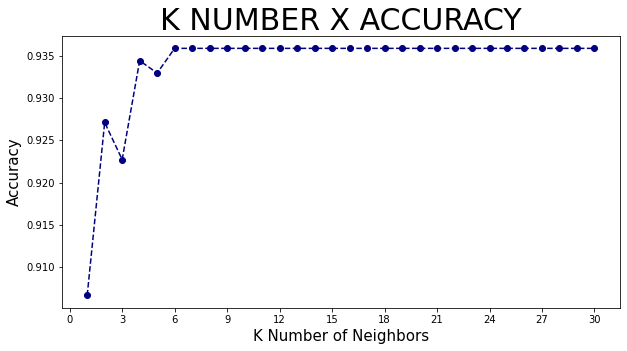

In [334]:
#gráfico da acurácia em relação ao número de vizinhos
import matplotlib.pyplot as plt
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,31,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

## Árvore de decisão

In [335]:
#importando um algoritmo de classificação: árvore de decisão
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [336]:
#declarar tree como o algoritmo
clf = tree.DecisionTreeClassifier()

In [337]:
#treinar o algoritmo com a base de treinamento
clf = clf.fit(X_train, y_train)

In [338]:
#Features mais importantes
for feature,importancia in zip(df.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

idade:0.3056404243220477
num_sex_parceiros:0.1208279280486395
num_gravidez:0.11262677221388981
fumante:0.012342273185242046
fumante_anos:0.12249158479575717
contracep_hormonais:0.03716756477625963
contracep_hormonais_anos:0.19034836857760132
DIU:0.0
DIU_anos:0.006680773398925178
DSTs:0.027424601535939737
num_DSTs:0.06444970914569804


In [339]:
resultado = clf.predict(X_test)
resultado

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [340]:
df["Qualidade da predição"] = clf.predict(X)
df.sample(15,random_state=22)

,idade,num_sex_parceiros,num_gravidez,fumante,fumante_anos,contracep_hormonais,contracep_hormonais_anos,DIU,DIU_anos,DSTs,num_DSTs,biopsia,Qualidade da predição
730,40,3,2,0,0.0,1,20.00,1,4.0,0,0.0,0,0
5,42,3,2,0,0.0,0,0.00,0,0.0,0,0.0,0,0
36,39,2,4,0,0.0,1,1.00,0,0.0,0,0.0,0,0
614,24,1,1,0,0.0,1,0.75,0,0.0,1,2.0,1,1
447,17,3,1,0,0.0,0,0.00,0,0.0,0,0.0,0,0
302,23,4,3,1,1.0,1,7.00,0,0.0,0,0.0,0,0
520,17,2,2,0,0.0,1,1.00,0,0.0,0,0.0,0,0
130,28,2,6,0,0.0,1,5.00,0,0.0,0,0.0,0,0
123,29,5,2,0,0.0,1,2.00,0,0.3,1,2.0,0,0
248,25,2,2,0,0.0,1,7.00,0,0.0,0,0.0,0,0


In [341]:
#fazer a predição de um exemplo
#o parâmetro tem que ser no formato de uma matriz/dataframe
print(clf.predict([[1,1,0,1,0,0,1,0,1,0,1]]))

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


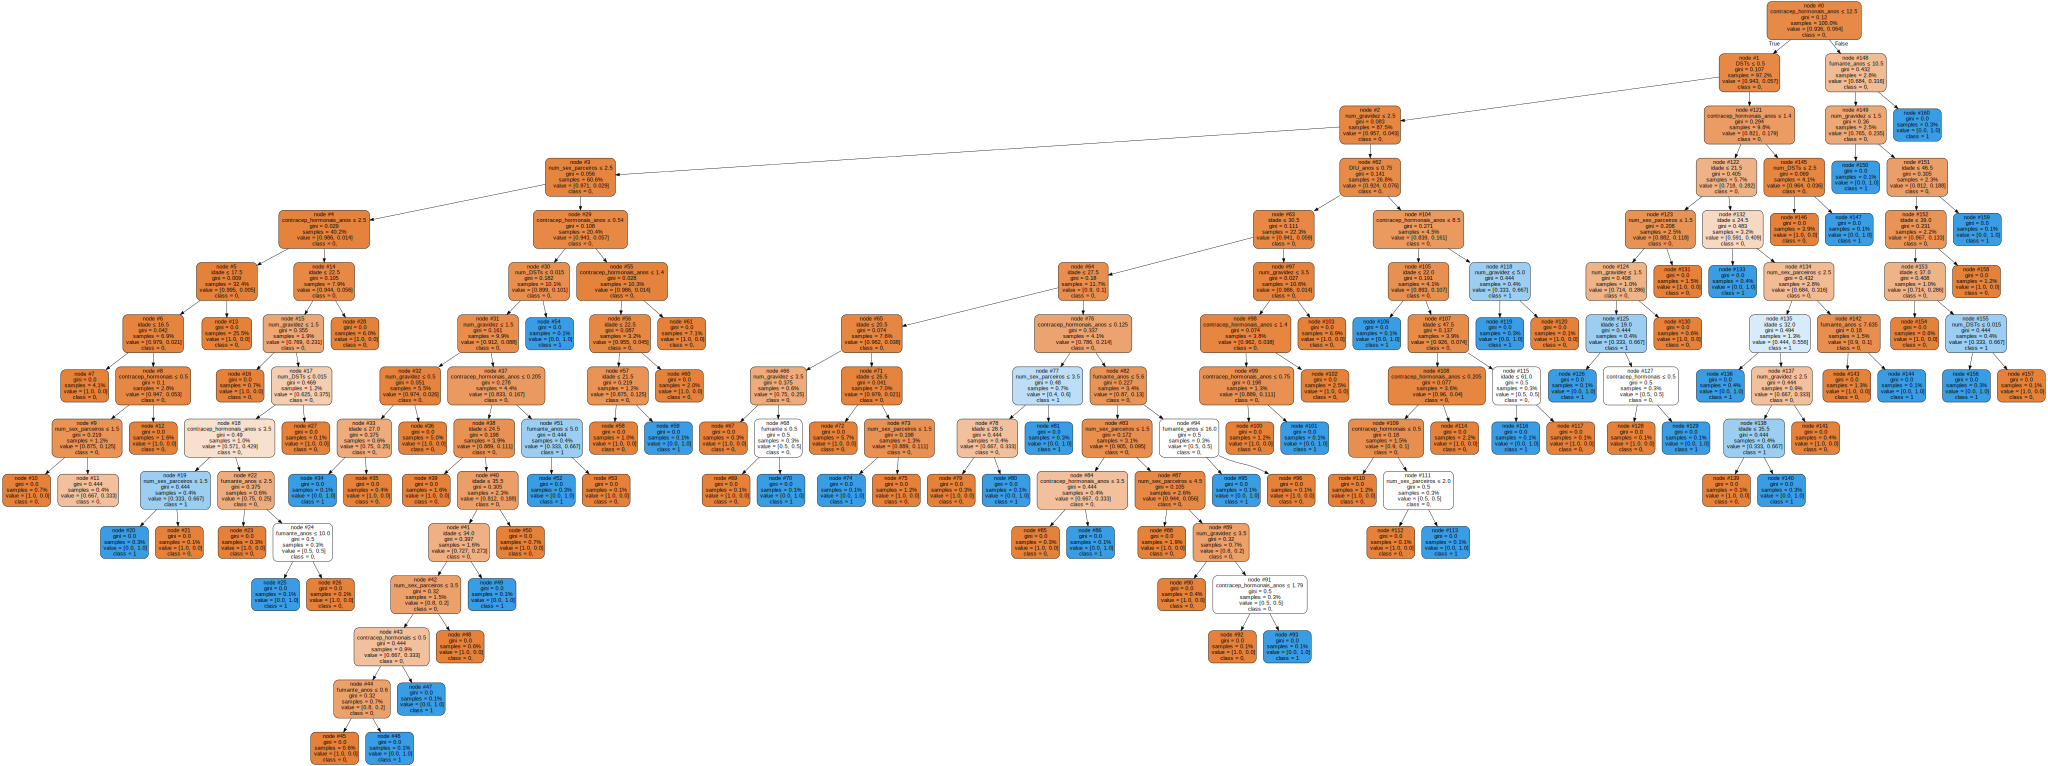

In [342]:
#plotar a árvore de decisão
import pydot
import graphviz

dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names = df.drop(columns=['biopsia','Qualidade da predição']).columns,
         class_names=['0,','1'],  #colocar as classes do teu modelo
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

In [343]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source


# feature labels
features_label = df.drop(columns=['biopsia','Qualidade da predição'],axis=1).columns

# class label
class_label = ['0','1']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Avaliação da Árvore de decisão

In [344]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0  1  All
Real                
0        154  7  161
1          9  2   11
All      163  9  172


In [345]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       161
           1       0.22      0.18      0.20        11

    accuracy                           0.91       172
   macro avg       0.58      0.57      0.58       172
weighted avg       0.90      0.91      0.90       172



##Regressão logística

In [346]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [347]:
# Criando modelo e treinando com os dados de treino
clr = LogisticRegression()
clr.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_clr = clr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [348]:
print(classification_report(y_test, resultado_clr))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       161
           1       0.00      0.00      0.00        11

    accuracy                           0.94       172
   macro avg       0.47      0.50      0.48       172
weighted avg       0.88      0.94      0.91       172



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Comparação dos modelos

In [349]:
#avaliar o modelo criado, o modelo fará a predição dos valores em X e a resposta será comparada com o que está em y
#quanto maior de 1 melhor o resultado
#abaixo de 0,5 é muito ruim
#faz um teste com a própria base de treinamento e com a de teste para comparação
#o .score indica a acurácia do modelo
print("Árvore de decisão:   Treinamento - ",clf.score(X_train,y_train),", Teste - ",clf.score(X_test,y_test))
print("Knn:                 Treinamento - ",knn.score(X_train,y_train),", Teste - ",knn.score(X_test,y_test))
print("Regressão Lógistica: Treinamento - ",clr.score(X_train,y_train),", Teste - ",clr.score(X_test,y_test))

Árvore de decisão:   Treinamento -  0.9985422740524781 , Teste -  0.9069767441860465
Knn:                 Treinamento -  0.9446064139941691 , Teste -  0.9186046511627907
Regressão Lógistica: Treinamento -  0.9358600583090378 , Teste -  0.936046511627907


#Exportando Modelo

##Exportar modelo Arvóre de Desisão

In [148]:
from sklearn.tree import DecisionTreeClassifier
modelo_tree = DecisionTreeClassifier(random_state=1)
modelo_tree.fit(X_train,y_train)


DecisionTreeClassifier(random_state=1)

In [150]:
from sklearn.metrics import classification_report
predicoes = modelo_tree.predict(X_test)
print(classification_report(y_test,predicoes))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       161
           1       0.18      0.18      0.18        11

    accuracy                           0.90       172
   macro avg       0.56      0.56      0.56       172
weighted avg       0.90      0.90      0.90       172



In [168]:
with open('modeloCervicalC.pkl', 'wb') as file:
    pickle.dump(modelo_tree, file)

In [169]:
from google.colab import files
files.download('modeloCervicalC.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [170]:
arquivo = files.upload()

Saving modeloCervicalC.pkl to modeloCervicalC (2).pkl


In [171]:
with open('modelo.pkl', 'rb') as f:
    model = pickle.load(f)

In [172]:
pred = model.predict([[59,2,1,1,4,1,1,0,0,1,5]])
pred[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1

##Exportar modelo Regressão logística

In [350]:
# Criando modelo e treinando com os dados de treino
clr = LogisticRegression()
clr.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_clr = clr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [351]:
import pickle
with open('modeloCervCanRegre.pkl', 'wb') as file:
    pickle.dump(clr, file)

In [357]:
from google.colab import files
files.download('modeloCervCanRegre.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [355]:
with open('modeloCervCanRegre.pkl', 'rb') as f:
    modelRG = pickle.load(f)

In [360]:
pred = modelRG.predict([[18,2,1,0,0,0,0,0,0,0,0]])
pred[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0

In [ ]:
pred = modelRG.predict([[59,2,1,1,4,1,1,0,0,1,5]])
pred[0]